In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load Models

In [ ]:
import joblib

Model_A = joblib.load('/content/drive/MyDrive/ModelA_balanced.pkl')
Model_B = joblib.load('/content/drive/MyDrive/ModelB_imbalanced.pkl')

In [ ]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score,precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load both vectorizers
vectorizer_bal = joblib.load('/content/drive/MyDrive/balanced_split/vectorizer_bal.pkl')
vectorizer_unbal = joblib.load('/content/drive/MyDrive/unbalanced_split/vectorizer_unbal.pkl')

# Load raw text test sets
X_test_bal = pd.read_csv('/content/drive/MyDrive/balanced_split/X_test_bal.csv').squeeze()
y_test_bal = pd.read_csv('/content/drive/MyDrive/balanced_split/y_test_bal.csv')
X_test_unbal = pd.read_csv('/content/drive/MyDrive/unbalanced_split/X_test_unbal.csv').squeeze()
y_test_unbal = pd.read_csv('/content/drive/MyDrive/unbalanced_split/y_test_unbal.csv')


# Re-vectorize for cross-testing
X_test_bal_for_unbal = vectorizer_unbal.transform(X_test_bal)
X_test_unbal_for_bal = vectorizer_bal.transform(X_test_unbal)


Model A tested on imbalanced


 Model_A
Accuracy: 0.4670
Macro F1-Score: 0.4692

              precision    recall  f1-score   support

           1       0.50      0.74      0.59       200
           2       0.33      0.33      0.33       300
           3       0.44      0.38      0.41       500
           4       0.54      0.39      0.45       600
           5       0.49      0.66      0.56       400

    accuracy                           0.47      2000
   macro avg       0.46      0.50      0.47      2000
weighted avg       0.47      0.47      0.46      2000



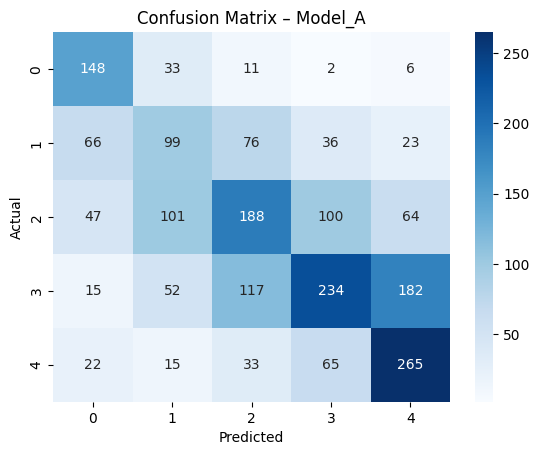

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test, title):
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')

    print(f"\n {title}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Macro F1-Score: {f1_macro:.4f}\n")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix – {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return acc, f1_macro

prec_A_on_unbal = precision_score(y_test_unbal, Model_A.predict(X_test_unbal_for_bal), average='macro')
rec_A_on_unbal  = recall_score(y_test_unbal, Model_A.predict(X_test_unbal_for_bal), average='macro')

# Model_A (trained on balanced) → Test on imbalanced data
X_test_unbal_for_bal = vectorizer_bal.transform(X_test_unbal)

acc_A_on_unbal, f1_A_on_unbal = evaluate_model(
    Model_A,
    X_test_unbal_for_bal,
    y_test_unbal,
    "Model_A"
)

Model B tested on balanced


Model_B
Accuracy: 0.4865
Macro F1-Score: 0.4855

              precision    recall  f1-score   support

           1       0.67      0.64      0.65       400
           2       0.39      0.34      0.37       400
           3       0.38      0.44      0.41       400
           4       0.41      0.38      0.39       400
           5       0.58      0.63      0.61       400

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000



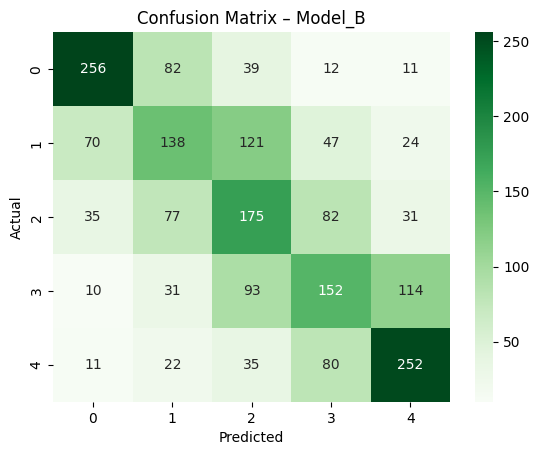

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test, title):
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')

    print(f"\n{title}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Macro F1-Score: {f1_macro:.4f}\n")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.title(f"Confusion Matrix – {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return acc, f1_macro
prec_B_on_bal = precision_score(y_test_bal, Model_B.predict(X_test_bal_for_unbal), average='macro')
rec_B_on_bal  = recall_score(y_test_bal, Model_B.predict(X_test_bal_for_unbal), average='macro')


# Model_B (trained on imbalanced) → Test on balanced data
X_test_bal_for_unbal = vectorizer_unbal.transform(X_test_bal)

acc_B_on_bal, f1_B_on_bal = evaluate_model(
    Model_B,
    X_test_bal_for_unbal,
    y_test_bal,
    "Model_B"
)

Comparison Table

In [ ]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["Model_A (Balanced)", "Model_B (Imbalanced)"],
    "Trained_On": ["Balanced", "Imbalanced"],
    "Tested_On": ["Imbalanced", "Balanced"],
    "Accuracy": [acc_A_on_unbal, acc_B_on_bal],
    "Precision (Macro)": [prec_A_on_unbal, prec_B_on_bal],
    "Recall (Macro)": [rec_A_on_unbal, rec_B_on_bal],
    "F1 (Macro)": [f1_A_on_unbal, f1_B_on_bal]
})

print("\n\n Cross-Testing Summary:")
display(results.round(4))



 Cross-Testing Summary:


,Model,Trained_On,Tested_On,Accuracy,Precision (Macro),Recall (Macro),F1 (Macro)
0,Model_A (Balanced),Balanced,Imbalanced,0.4670,0.4590,0.4997,0.4692
1,Model_B (Imbalanced),Imbalanced,Balanced,0.4865,0.4867,0.4865,0.4855
